In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
import os
os.chdir(r'C:\Users\itwill\Desktop')
print(os.getcwd())

C:\Users\itwill\Desktop


In [20]:
import pandas as pd
data_taka=pd.read_csv('taka_remove.csv')

In [21]:
import re
import emoji

def clean_text(text):
    # 이모지 제거
    text = emoji.replace_emoji(text, replace='')

    # 줄바꿈 → 공백
    text = re.sub(r'\n', ' ', text)

    # 숫자 포함
    text = re.sub(r'\S*\d\S*', '', text)

    # 한자 제거
    text = re.sub(r'#\S*[\u4E00-\u9FFF]\S*', '', text)

    # 일본어 거거
    text = re.sub(r'#\S*[\u3040-\u309F\u30A0-\u30FF]\S*', '', text)

    # 한자/일본어 제거
    text = re.sub(r'[\u4E00-\u9FFF\u3040-\u309F\u30A0-\u30FF]', '', text)

    # 특수문자 제거 
    text = re.sub(r'[^\w\s#]', '', text)

    # 여러 공백을 하나로, 양쪽 공백 제거
    text = re.sub(r'\s+', ' ', text).strip()

    return text


data_taka['caption_clean'] = data_taka['caption'].apply(lambda x: clean_text(x) if isinstance(x, str) else '')


In [22]:
data_taka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            246 non-null    object 
 1   caption        246 non-null    object 
 2   hashtags       213 non-null    object 
 3   likes          240 non-null    float64
 4   image_url      246 non-null    object 
 5   caption_clean  246 non-null    object 
dtypes: float64(1), object(5)
memory usage: 11.7+ KB


In [23]:
import pandas as pd
data_tongyeong=pd.read_csv('tongyeong.csv')

In [24]:
import re
import emoji

def clean_text(text):
    # 이모지 제거
    text = emoji.replace_emoji(text, replace='')

    # 줄바꿈 → 공백
    text = re.sub(r'\n', ' ', text)

    # 숫자 포함
    text = re.sub(r'\S*\d\S*', '', text)

    # 한자 제거
    text = re.sub(r'#\S*[\u4E00-\u9FFF]\S*', '', text)

    # 일본어 거거
    text = re.sub(r'#\S*[\u3040-\u309F\u30A0-\u30FF]\S*', '', text)

    # 한자/일본어 제거
    text = re.sub(r'[\u4E00-\u9FFF\u3040-\u309F\u30A0-\u30FF]', '', text)

    # 특수문자 제거 
    text = re.sub(r'[^\w\s#]', '', text)

    # 여러 공백을 하나로, 양쪽 공백 제거
    text = re.sub(r'\s+', ' ', text).strip()

    return text


data_tongyeong['caption_clean'] = data_tongyeong['caption'].apply(lambda x: clean_text(x) if isinstance(x, str) else '')


In [25]:
###################################################    KoBERT     #####################################################

In [26]:
from kobert_transformers import get_tokenizer
from transformers import BertModel

model = BertModel.from_pretrained("monologg/kobert")
tokenizer = get_tokenizer()

# 문장
sentence = "안녕하세요, KoBERT 테스트 중입니다."

# 4. 토큰화 출력
tokens = tokenizer.tokenize(sentence)
print("Tokens:", tokens)

# 5. 토큰을 모델 입력 형태로 변환
inputs = tokenizer(sentence, return_tensors="pt")

# 6. 모델에 입력 후 출력 받기
outputs = model(**inputs)

print("Last Hidden State shape:", outputs.last_hidden_state.shape)
print("Pooler Output shape:", outputs.pooler_output.shape)


Tokens: ['▁안', '녕', '하세요', ',', '▁K', 'o', 'B', 'ER', 'T', '▁테스트', '▁중', '입니다', '.']
Last Hidden State shape: torch.Size([1, 15, 768])
Pooler Output shape: torch.Size([1, 768])


In [27]:
import transformers
import kobert_transformers
print(transformers.__version__)  # 4.54.1 이상이면 충분함
print(kobert_transformers.__version__)  # 0.6.0 이상이면 충분함

4.54.1
0.6.0


In [28]:
import kobert_transformers
print(dir(kobert_transformers))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'f', 'get_distilkobert_lm', 'get_distilkobert_model', 'get_kobert_lm', 'get_kobert_model', 'get_tokenizer', 'load_model', 'os', 'tokenization_kobert', 'utils', 'version_txt']


In [29]:
from kobert_transformers import get_tokenizer
from transformers import BertModel

model = BertModel.from_pretrained("skt/kobert-base-v1")
tokenizer = get_tokenizer()

# 문장
sentence = "안녕하세요, KoBERT 테스트 중입니다."

# 4. 토큰화 출력
tokens = tokenizer.tokenize(sentence)
print("Tokens:", tokens)

# 5. 토큰을 모델 입력 형태로 변환
inputs = tokenizer(sentence, return_tensors="pt")

# 6. 모델에 입력 후 출력 받기
outputs = model(**inputs)

print("Last Hidden State shape:", outputs.last_hidden_state.shape)
print("Pooler Output shape:", outputs.pooler_output.shape)

# last_hidden_state : 문장 내 각 토큰의 문맥적 의미 임베딩
# pooler_output : 문장 전체를 대표하는 임베딩 벡터, [cLS]토큰의 마지막 hidden state에 tanh활성화 함수를 적용한 값



Tokens: ['▁안', '녕', '하세요', ',', '▁K', 'o', 'B', 'ER', 'T', '▁테스트', '▁중', '입니다', '.']
Last Hidden State shape: torch.Size([1, 15, 768])
Pooler Output shape: torch.Size([1, 768])


In [30]:
############kobert 사용하기 직접

In [31]:
tokenized_texts = [tokenizer.tokenize(sentence) for sentence in data_taka['caption_clean']]
data_taka["tokens"] = data_taka['caption_clean'].apply(lambda x: tokenizer.tokenize(x))
data_taka.to_csv("taka_tokenized_check_and_remove.csv", index=False, encoding="utf-8-sig")

data_taka.drop(columns=["tokens"], inplace=True)

In [32]:
!pip install tqdm --quiet
!pip install ipywidgets --quiet

In [33]:
##############example##############

In [34]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# KoBERT 모델과 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

# 문장을 임베딩으로 변환하는 함수
def get_embedding(text):
    # 텍스트를 토큰화
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    
    # 모델을 통해 임베딩 계산
    with torch.no_grad():
        outputs = model(**inputs)
    
    # 임베딩은 마지막 hidden state를 사용
    embeddings = outputs.last_hidden_state.mean(dim=1)  # 평균으로 문서 임베딩을 구함
    
    return embeddings

# 두 문서 예시
doc1 = "오늘 날씨가 너무 좋다."
doc2 = "오늘은 날씨가 맑고 기분이 좋다."

# 각 문서의 임베딩을 구함
embedding1 = get_embedding(doc1)
embedding2 = get_embedding(doc2)

# 코사인 유사도 계산
cos_sim = cosine_similarity(embedding1.numpy(), embedding2.numpy())
print(f"Cosine similarity between the two documents: {cos_sim[0][0]}")


Cosine similarity between the two documents: 0.7597843408584595


In [35]:
#글이 길면 토큰이 잘릴 수 있으므로 문장 요약을 하거나, 
#글의 길이나 좋아요 수 등을 고려하여 각 글에 가중치를 부여할 수 도 있다.
#250개의 글에 대해 한 번에 bert임베딩을 하면 메모리 사용량이 너무 많을 수 있으니 이때는 배치(batch)처리로 나누어서 임베딩 구할 수 있음

In [36]:
from kobert_transformers import get_tokenizer
from transformers import BertModel

model = BertModel.from_pretrained("skt/kobert-base-v1")
tokenizer = get_tokenizer()

def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    #평균 풀링: 모든 토큰의 표현에 평균 풀링으로 문장 표현을 얻으면 문장 표현은 본질적으로 모든 단어(토큰)의 의미를 가짐
    embeddings = outputs.last_hidden_state.mean(dim=1)
    
    return embeddings
    
def add_embeddings_to_dataframe(data_taka):
    embeddings = []
    for text in data_taka['caption_clean']:
        emb = get_embedding(text)
        embeddings.append(emb.squeeze().numpy())  # 텐서를 numpy 배열로 변환 후 리스트에 추가
    
    # 새 컬럼 'embedding'으로 임베딩 값 추가
    data_taka['embeddings'] = embeddings
    return data_taka

# DataFrame에 임베딩 추가
data_with_embeddings = add_embeddings_to_dataframe(data_taka)

# 결과 출력
print(data_taka['embeddings'][:5])

0    [0.015660496, -0.12379188, 0.29436022, -3.8897...
1    [-0.023761913, -0.121277794, 0.40451685, -5.30...
2    [0.004951356, -0.09263014, 0.20708022, -3.7605...
3    [-0.065095134, -0.218861, 0.075367354, -3.2439...
4    [0.09418768, -0.18728587, 0.19061619, -3.62158...
Name: embeddings, dtype: object


In [37]:
from kobert_transformers import get_tokenizer
from transformers import BertModel

model = BertModel.from_pretrained("skt/kobert-base-v1")
tokenizer = get_tokenizer()

def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    #평균 풀링: 모든 토큰의 표현에 평균 풀링으로 문장 표현을 얻으면 문장 표현은 본질적으로 모든 단어(토큰)의 의미를 가짐
    embeddings = outputs.last_hidden_state.mean(dim=1)
    
    return embeddings

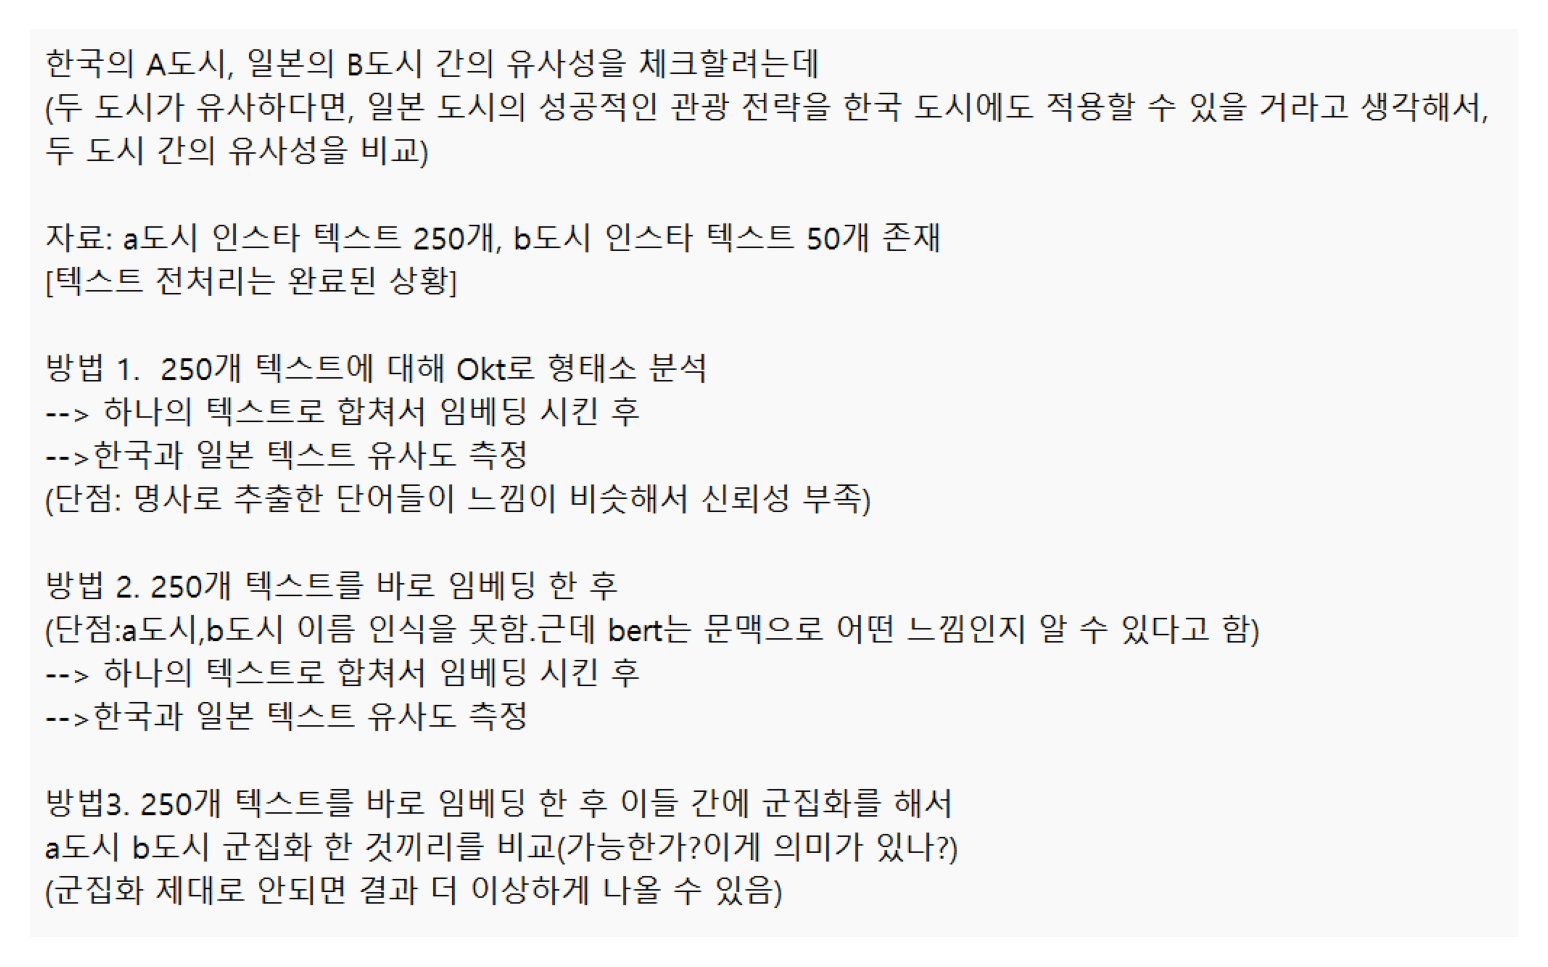

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 경로 설정
img = mpimg.imread(r'C:\Users\itwill\Desktop\ddd.png')

# 이미지를 화면에 표시
plt.figure(dpi=300)
plt.imshow(img)
plt.axis('off')  
plt.show()

In [39]:
from konlpy.tag import Okt
okt=Okt()
def extract_nouns(text):
    # Okt를 사용해 명사만 추출
    nouns = okt.nouns(text)
    # 한 단어로 이루어진 명사는 삭제
    filtered_nouns = [noun for noun in nouns if len(noun) > 1]
    return ' '.join(filtered_nouns)


data_taka['caption_nouns'] = data_taka['caption_clean'].apply(extract_nouns)
result_taka = ' '.join(data_taka['caption_nouns'])

data_tongyeong['caption_nouns'] = data_tongyeong['caption_clean'].apply(extract_nouns)
result_tongyeong= ' '.join(data_tongyeong['caption_nouns'])


In [40]:
from collections import Counter


# 결과 텍스트에서 명사들을 추출
all_nouns_taka = ' '.join(data_taka['caption_nouns']).split()
all_nouns_tongyeong= ' '.join(data_tongyeong['caption_nouns']).split()

# 명사들의 빈도 계산
counter_taka = Counter(all_nouns_taka)
counter_tongyeong= Counter(all_nouns_tongyeong)

# 상위 50개의 명사 추출
top_50_taka = counter_taka.most_common(50)
top_50_tongyeong = counter_tongyeong.most_common(50)

# 상위 50개 명사 출력
print("Top 50 Nouns in Taka:")
for noun, freq in top_50_taka:
    print(f"{noun}: {freq}")

print("\nTop 50 Nouns in Tongyeong:")
for noun, freq in top_50_tongyeong:
    print(f"{noun}: {freq}")

Top 50 Nouns in Taka:
우동: 363
다카마쓰: 234
여행: 202
일본: 165
공원: 68
시간: 54
다카: 54
소도시: 52
야돈: 51
사진: 49
마츠: 44
투어: 42
예약: 39
시코쿠: 35
호텔: 35
추천: 34
예술: 34
도시: 33
미술관: 31
맛집: 30
온천: 28
진짜: 26
하나: 26
숙소: 24
버스: 24
방문: 23
생각: 22
튀김: 22
카페: 22
사람: 21
정말: 21
가장: 21
마루: 21
도시마: 21
공항: 19
이번: 19
정원: 19
하루: 19
힐링: 18
카가와현: 18
마치: 18
자전거: 18
작품: 18
우리: 18
바로: 17
여기: 17
가게: 17
포함: 17
사누키: 17
올리브: 17

Top 50 Nouns in Tongyeong:
통영: 875
여행: 203
통영시: 198
경남: 157
카페: 154
바다: 142
맛집: 109
여름: 88
케이크: 73
추천: 72
시간: 71
거제: 71
디저트: 63
공원: 54
마을: 52
수국: 50
힐링: 45
코스: 44
축제: 42
펜션: 42
고양이: 41
고성: 39
투어: 38
벽화: 38
비진도: 38
행사: 37
마음: 36
사진: 36
이번: 36
한산: 35
풍경: 35
방문: 35
휴가: 34
여행지: 33
욕지도: 33
자연: 32
필수: 32
확인: 32
사람: 31
체험: 31
장소: 31
여유: 31
가능: 31
오션: 30
도시: 29
하나: 29
소개: 29
요트: 28
준비: 28
바로: 28


In [41]:
import torch
from kobert_transformers import get_tokenizer
from transformers import BertModel

from sklearn.metrics.pairwise import cosine_similarity

model = BertModel.from_pretrained("skt/kobert-base-v1")
tokenizer = get_tokenizer()

# 텍스트를 BERT에 맞게 토큰화하고, 임베딩을 추출하는 함수
def embed_text(text):
    # 텍스트를 토큰화 (각 단어를 BERT 입력 형식으로 변환)
    inputs = tokenizer.encode(text, return_tensors="pt", max_length=512, truncation=True, padding=True)
    
    # BERT 모델을 사용해 임베딩 추출
    with torch.no_grad():
        outputs = model(inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1)  # 문장의 임베딩은 평균값으로 취합
    
    return embeddings

# 텍스트 임베딩
embedding_taka = embed_text(result_taka)
embedding_tongyeong= embed_text(result_tongyeong)

# 코사인 유사도 계산
similarity = cosine_similarity(embedding_taka.numpy(), embedding_tongyeong.numpy())

# 결과 출력
print(f"두 텍스트의 유사도: {similarity[0][0]:.4f}")

두 텍스트의 유사도: 0.9027
